- [10 大深度学习架构：计算机视觉优秀从业者必备（附代码实现）](https://mp.weixin.qq.com/s?__biz=MzA3MzI4MjgzMw==&mid=2650729755&idx=1&sn=a5849c082ed099abf931e004339cef4d&chksm=871b2965b06ca073ca5ed037622a0ddf88c327177786d0d8433d56c78af3d63d3e71995c0940&scene=21#wechat_redirect)

> 时刻跟上深度学习领域的最新进展变的越来越难，几乎每一天都有创新或新应用。但是，大多数进展隐藏在大量发表的 ArXiv / Springer 研究论文中。

# 什么是高级架构？

我们可以把高级架构定义为一个**具有良好记录的成功模型**；这主要见于挑战赛中，比如 ImageNet，其中你的任务是借助给定的数据解决图像识别等问题。

## 计算机视觉任务的类型

顾名思义，计算机视觉即通过创建人工模型来模拟本由人类执行的视觉任务。其本质是**人类的感知与观察是一个过程，它可在人工系统中被理解和实现**。

计算机视觉任务的主要类型如下：

- 物体识别／分类：在物体识别中，给出一张原始图像，你的任务是识别出该图像属于哪个类别。
- 分类 + 定位：如果图像中只有一个物体，你的任务是找到该物体在图像中的位置，一个更专业的称谓是定位。
- 物体检测：在物体检测中，你的任务是找到图像中多个物体的各自位置。这些物体可能属于同一类别，或者各自不同。
- 图像分割：图像分割是一个稍微复杂的任务，其目标是将每一个像素映射到正确的分类。

![](http://static.zybuluo.com/xinet/y9c97t955n9n6wh1cw4znhnx/640%5B1%5D.jpg)

## 1. AlexNet

AlexNet 是首个深度架构，它由深度学习先驱 Geoffrey Hinton 及其同僚共同引入。AlexNet 是一个简单却功能强大的网络架构，为深度学习的开创性研究铺平了道路。下图是论文作者提出架构的示图。
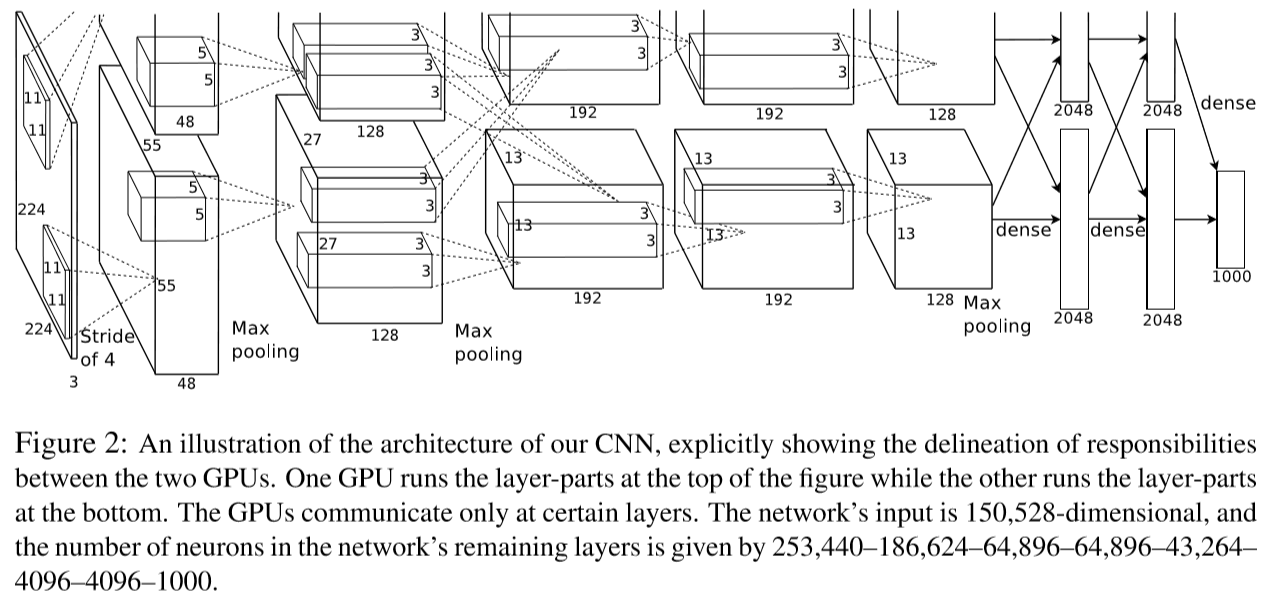

- 论文：ImageNet Classification with Deep Convolutional Neural Networks

    - 链接：https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
    - 代码实现：https://gist.github.com/JBed/c2fb3ce8ed299f197eff

## 2. VGG Net

VGG 网络由牛津可视化图形组（Visual Graphics Group）开发，因此其名称为 VGG。该网络的特点是金字塔形，与图像最近的底层比较宽，而顶层很深。

![](http://static.zybuluo.com/xinet/gfktbgsyh6zvvcjcqmzd8vo9/640.jpg)

### VGG 的优势：

适合在特定任务上进行基准测试。

VGG 的预训练网络可在互联网上免费获取，因此被广泛用于各种应用。

另一方面，它的主要缺陷在于如果从头训练，则过程缓慢。即使在性能很好的 GPU 上，也需要一周多的时间才能完成训练。

- 论文：Very Deep Convolutional Networks for Large-Scale Image Recognition
    - 链接：https://arxiv.org/abs/1409.1556
    - 代码实现：https://github.com/fchollet/keras/blob/master/keras/applications/vgg16.py


## 3. GoogleNet

GoogleNet（或 Inception 网络）是谷歌研究者设计的一种架构。GoogleNet 是 ImageNet 2014 的冠军，是当时最强大的模型。

该架构中，随着深度增加（它包含 $22$ 层，而 VGG 只有 $19$ 层），研究者还开发了一种叫作「Inception 模块」的新型方法。

![](http://static.zybuluo.com/xinet/0oxm204krxe5u411rlwqub3j/640%5B3%5D.jpg)

如上图所示，它与我们之前看到的序列架构发生了很大改变。单个层中出现了多种「特征抽取器（feature extractor）」。这间接地改善了该网络的性能，因为该网络在训练过程中有多个选项可以选择，来解决该任务。它可以选择与输入进行卷积，也可以直接将其池化。

最终架构包括堆叠在一起的多个 inception 模块。GoogleNet 的训练过程也有稍许不同，即最上层有自己的输出层。这一细微差别帮助模型更快地进行卷积，因为模型内存在联合训练和层本身的并行训练。

### GoogleNet 的优势在于：

GoogleNet 训练速度比 VGG 快。
预训练 GoogleNet 的规模比 VGG 小。VGG 模型大于 500 MB，而 GoogleNet 的大小只有 96MB。

GoogleNet 本身没有短期劣势，但是该架构的进一步改变使模型性能更佳。其中一个变化是 Xception 网络，它增加了 inception 模块的发散极限（我们可以从上图中看到 GoogleNet 中有 4 个 inception 模块）。现在从理论上讲，该架构是无限的（因此又叫极限 inception！）。

- 论文：Rethinking the Inception Architecture for Computer Vision

    - 链接：https://arxiv.org/abs/1512.00567
    - 代码实现：https://github.com/fchollet/keras/blob/master/keras/applications/inception_v3.py

## 4.ResNet

ResNet 是一个妖怪般的架构，让我们看到了深度学习架构能够有多深。残差网络（ResNet）包含多个后续残差模块，是建立 ResNet 架构的基础。下图是残差模块的表示图：


简言之，一个残差模块有两个选择：完成输入端的一系列函数，或者跳过此步骤。

类似于 GoogleNet，这些残差模块一个接一个地堆叠，组成了完整的端到端网络。

ResNet 引入的新技术有：

使用标准的 SGD，而非适应性学习技术。它联通一个合理的初始化函数（保持训练的完整性）做到的这一点。
输入预处理的变化，输入首先被区分到图像块中，然后输送到网络中。

ResNet 主要的优势是数百，甚至数千的残差层都能被用于创造一个新网络，然后训练。这不同于平常的序列网络，增加层数量时表现会下降。

- 论文：Deep Residual Learning for Image Recognition
    - 链接：https://arxiv.org/abs/1512.03385
    - 代码实现：https://github.com/fchollet/keras/blob/master/keras/applications/resnet50.py
    
## 5. ResNeXt

ResNeXt 据说是解决目标识别问题的最先进技术。它建立在 inception 和 resnet 的概念上，并带来改进的新架构。下图是对 ResNeXt 模块中的残差模块的总结。


- 论文：Aggregated Residual Transformations for Deep Neural Networks
    - 链接：https://arxiv.org/pdf/1611.05431.pdf
    - 代码实现：https://github.com/titu1994/Keras-ResNeXt
    
## 6. RCNN (基于区域的 CNN)

基于区域的 CNN 架构据说是所有深度学习架构中对目标检测问题最有影响力的架构。为了解决检测问题，RCNN 尝试在图像中所有物体上画出边界框，然后识别图像中的物体。工作原理如下：




- 论文：Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks
    - 链接：https://arxiv.org/abs/1506.01497
    - 代码实现：https://github.com/yhenon/keras-frcnn
    
## 7. YOLO (You Only Look once)

YOLO 是当前深度学习领域解决图像检测问题最先进的实时系统。如下图所示，YOLO 首先将图像划分为规定的边界框，然后对所有边界框并行运行识别算法，来确定物体所属的类别。确定类别之后，yolo 继续智能地合并这些边界框，在物体周围形成最优边界框。

这些步骤全部并行进行，因此 YOLO 能够实现实时运行，并且每秒处理多达 40 张图像。

尽管相比于 RCNN 它的表现有所降低，但在日常实时的问题中它还是有优势的。下图是 YOLO 架构的示图：



- 论文：You Only Look Once: Unified, Real-Time Object Detection
    - 链接：https://pjreddie.com/media/files/papers/yolo.pdf
    - 代码实现：https://github.com/allanzelener/YAD2K

## 8.SqueezeNet

SqueeNet 架构是在移动平台这样的低宽带场景中极其强大的一种架构。这种架构只占用 4.9 MB 的空间，而 Inception 架构大小为 100MB。这种巨大的差距由一种名为 Fire Module 的特殊结构引起。下图是 Fire Module 的表示图：



- 论文：SQUEEZENET: ALEXNET-LEVEL ACCURACY WITH 50X FEWER PARAMETERS AND <0.5MB MODEL SIZE
    - 链接：https://arxiv.org/abs/1602.07360
    - 代码实现：https://github.com/rcmalli/keras-squeezenet

## 9.SegNet 

SegNet 是一个用于解决图像分割问题的深度学习架构。它包含处理层（编码器）序列，之后是对应的解码器序列，用于分类像素。下图是 SegNet 解析图：

SegNet 的一个主要特征是在编码器网络的池化指标与解码器网络的池化指标连接时，分割图像保留高频细节。简言之，直接进行信息迁移，而非卷积它们。在处理图像分割问题时，SgeNet 是最好的模型之一。

- 论文：SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation
    - 链接：https://arxiv.org/abs/1511.00561
    - 代码实现：https://github.com/imlab-uiip/keras-segnet



## 10.GAN

GAN 是神经网络架构中完全不同的类别。GAN 中，一种神经网络用于生成全新的、训练集中未曾有过的图像，但却足够真实。例如，以下是 GAN 工作原理的解析图。



- 论文：Generative Adversarial Networks
    - 链接：https://arxiv.org/abs/1406.2661
    - 代码实现：https://github.com/bstriner/keras-adversarial




## [如何理解空洞卷积（dilated convolution）？](https://www.zhihu.com/question/54149221)









## [SENet](https://mp.weixin.qq.com/s?__biz=MzA3MzI4MjgzMw==&mid=2650729486&idx=3&sn=5b2b6f0e7443ecf0971d4743d5480bb6&chksm=871b2870b06ca166bc18413060898886db534c2b5ade468f832d3f85d5d75549f15293cea6cd&mpshare=1&scene=1&srcid=0822wk5DEWG7YU89UZr1yEup#rd)













## [可变形卷积网络：计算机新“视”界](http://imgtec.eetrend.com/blog/9861)

- [可变形卷积网络：计算机新“视”界](http://chuansong.me/n/1900000251616)

# MaxOut

Maxout 是深度学习网络中的一层网络，就像池化层、卷积层一样等，我们可以把 maxout 看成是网络的激活函数层。

maxout的拟合能力是非常强的，它可以拟合任意的的凸函数。最直观的解释就是任意的凸函数都可以由分段线性函数以任意精度拟合（学过高等数学应该能明白），而maxout又是取k个隐隐含层节点的最大值，这些”隐隐含层"节点也是线性的，所以在不同的取值范围下，最大值也可以看做是分段线性的（分段的个数与k值有关）-本段摘自：http://www.cnblogs.com/tornadomeet/p/3428843.html

## Keras 实现

In [5]:
import keras

Using CNTK backend
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\cntk\default_options.py:89: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  args, _, _, _ = getargspec(function_or_class) if isfunction(function_or_class) else getargspec(function_or_class.__init__)


In [10]:
keras.layers.MaxoutDense??

## MXNet 实现

In [9]:
import mxnet as mx
import numpy as np
from mxnet import gluon, nd, autograd
from mxnet.gluon import nn

In [35]:
class MaxoutDense(nn.HybridBlock):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def maxout(X, W, b):
        y = nd.dot(X, W) + b
        return nd.max(y, axis=1)

In [34]:
def maxout(X, W, b):
    y = nd.dot(X, W) + b
    return nd.max(y, axis=1)

x = nd.random.normal(shape=(20, 100))
W = nd.random.normal(shape=(100, 4, 10))
b = nd.zeros(shape=(4, 10))
maxout(x, W, b)


[[ 19.37326813  11.53621197  10.76380444   0.89132601  23.14892769
   16.31108284  21.34720039   7.94896984  11.40742874  18.79942894]
 [  5.28567266  10.60042381  13.37805939  10.43304443  13.90044022
   10.95872402  10.83367634  10.50979519   8.14303398  18.24959564]
 [  8.04807568   4.06439447  10.53095245  12.20637894   7.82006073
   14.04342651  11.2944212   19.01530647   9.76364231  11.30483246]
 [  2.63934636  18.31528664  26.02896309   0.43162137  21.63051414
    4.93232536   5.50979471   7.48143101   6.2397871   12.84460926]
 [ 12.35324001  26.06477165  19.50542641  11.50181007   1.78623641
   26.58301735  16.46959496  17.75385094   4.28981256   9.57417011]
 [  0.98931897  14.73144436  12.42395401  22.736063    19.86310577
   15.87516308  10.0615387   11.01155472   2.96167541   6.99219418]
 [  9.61897087   0.81996816  18.84272575   5.1580143    9.33253765
    7.81777573  21.83223152   4.77284861   3.09951282   0.44500044]
 [  2.08618999  10.4521122    9.99131298   5.79115629 